In [2]:
%config Completer.use_jedi = False
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
## 生成数据集
# 使用线性模型参数 w=[2,−3.4]⊤ 、 b=4.2 和噪声项 ϵ 生成数据集及其标签：y=Xw+b+ϵ.
# 可以将  ϵ  视为捕获特征和标签时的潜在观测误差。在这里我们认为标准假设成立，即 ϵ 服从均值为0的正态分布。
# 为了简化问题，我们将标准差设为0.01。下面的代码生成合成数据集。

def synthetic_data(w, b, num_examples):  #@save
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 1000 X 2  2 X 1
    y = torch.matmul(X, w) + b # 1000 X 1
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.0694, -0.1446]) 
label: tensor([4.5633])


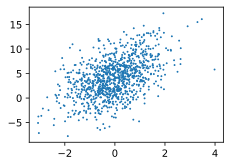

In [7]:
# 绘制图
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(),
                labels.detach().numpy(), 1);


In [9]:
## 读取数据集

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [13]:
batch_size = 2

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7745,  1.4119],
        [ 0.7541, -0.1355]]) 
 tensor([[-2.1523],
        [ 6.1781]])


In [17]:
## 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w,b)

tensor([[-0.0092],
        [-0.0064]], requires_grad=True) tensor([0.], requires_grad=True)


In [16]:
## 定义模型
def linreg(X, w, b): 
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [20]:
## 定义损失函数
def squared_loss(y_hat, y): 
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [21]:
## 定义优化算法
def sgd(params, lr, batch_size): 
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [23]:
## 训练过程
lr = 0.03
num_epochs = 100
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.000050
epoch 2, loss 0.000048
epoch 3, loss 0.000049
epoch 4, loss 0.000050
epoch 5, loss 0.000050
epoch 6, loss 0.000051
epoch 7, loss 0.000052
epoch 8, loss 0.000050
epoch 9, loss 0.000049
epoch 10, loss 0.000050
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000052
epoch 14, loss 0.000050
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000050
epoch 20, loss 0.000050
epoch 21, loss 0.000051
epoch 22, loss 0.000049
epoch 23, loss 0.000049
epoch 24, loss 0.000049
epoch 25, loss 0.000048
epoch 26, loss 0.000050
epoch 27, loss 0.000050
epoch 28, loss 0.000048
epoch 29, loss 0.000048
epoch 30, loss 0.000050
epoch 31, loss 0.000050
epoch 32, loss 0.000049
epoch 33, loss 0.000050
epoch 34, loss 0.000050
epoch 35, loss 0.000050
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000050
epoch 39, loss 0.000049
epoch 40, loss 0.000048
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e